## Satwik Dudeja - DSBA Intern @ The Sparks Foundation

# Task 2 - Unsupervised Learning

## K-Means Clustering

    This task involves making a clustering model to separate the data into different clusters. This is done using the K-Means algorithm.

### 1. Importing libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### 2. Importing and Preprocessing Data

    Source - https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view
    The data was downloaded and stored in the directory.

In [75]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [76]:
iris.drop('Id', inplace=True, axis=1)
pd.DataFrame.drop_duplicates(iris)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 3. Exploratory Data Analysis

    Exploring the data, and getting to know the dataset and how it can be evaluated, is an essential step.

In [77]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


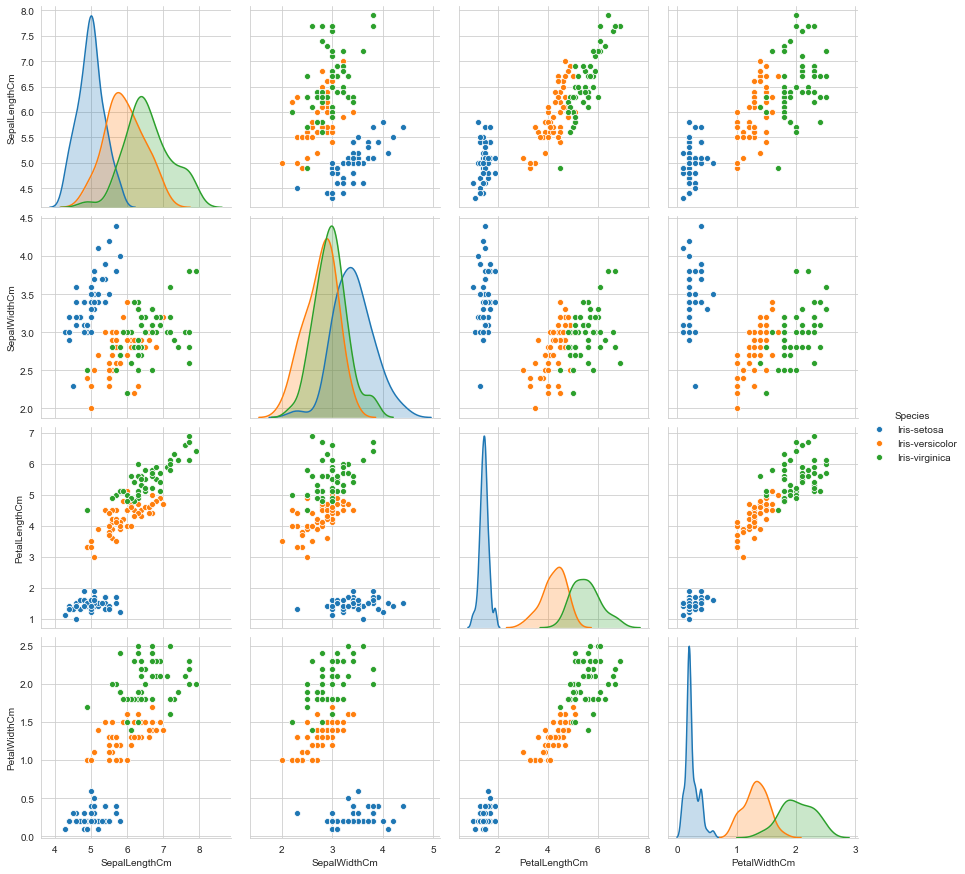

In [78]:
_ = sns.set_style("whitegrid");
_ = sns.pairplot(iris,hue="Species",height=3);
plt.show()

    There are three different species of flowers in the given dataset.
    Petal length and petal width are the most useful features to identify various flower types.
    While Setosa can be easily identified (linearly separable), virginica and Versicolor have some overlap (almost linearly separable).

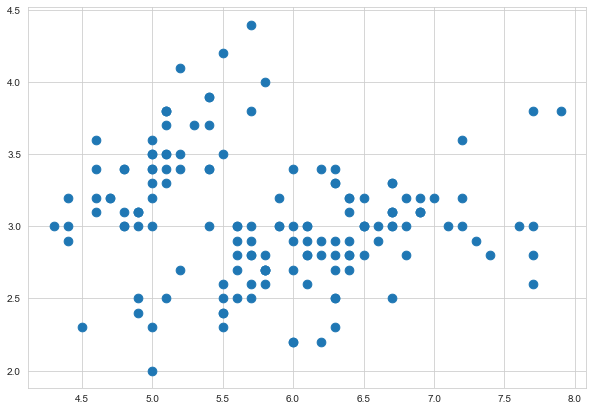

In [79]:
_ = plt.figure(figsize=(10, 7))
_ = plt.scatter(iris["SepalLengthCm"], iris["SepalWidthCm"], s=75)
plt.show()

### 4. Determining the number of clusters - The elbow method

    The optimum number of clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

In [80]:
X = iris.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    model.fit(X)
    wcss.append(model.inertia_)

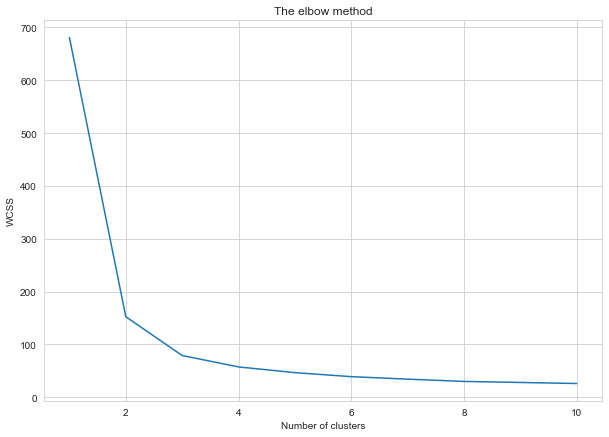

In [81]:
_ = plt.figure(figsize=(10, 7))
_ = plt.plot(range(1, 11), wcss)
_ = plt.title('The elbow method')
_ = plt.xlabel('Number of clusters')
_ = plt.ylabel('WCSS') 
plt.show()

    From this graph, it is clear that the number of clusters = 3.

### 5. The K-Means Clustering Model

In [82]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)

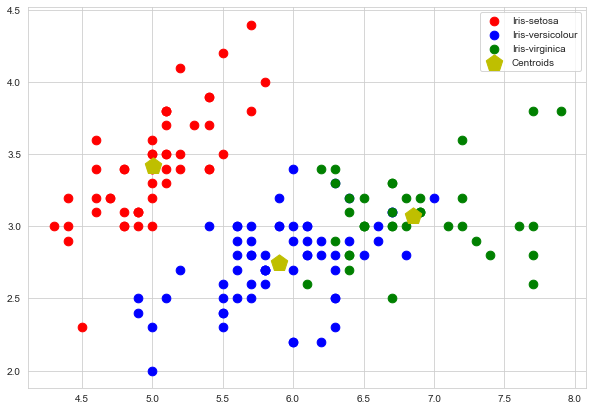

In [83]:
_ = plt.figure(figsize=(10, 7))
_ = plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'r', s=75, label = 'Iris-setosa')
_ = plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'b', s=75, label = 'Iris-versicolour')
_ = plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'g', s=75, label = 'Iris-virginica')

_ = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], marker='p', s=300, c = 'y', label = 'Centroids')

plt.legend()

#### Now plotting the same model between Petal Specifications - 

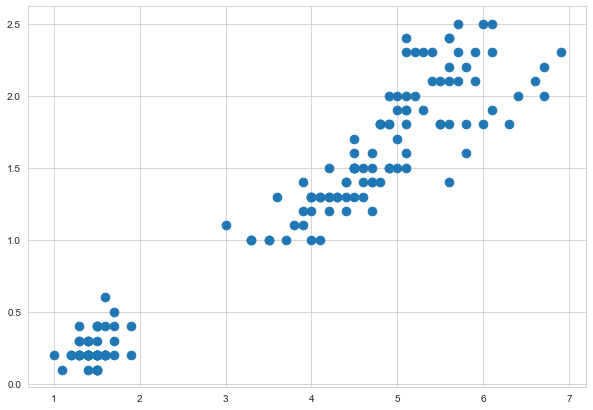

In [84]:
_ = plt.figure(figsize=(10, 7))
_ = plt.scatter(iris["PetalLengthCm"], iris["PetalWidthCm"], s=75)
plt.show()

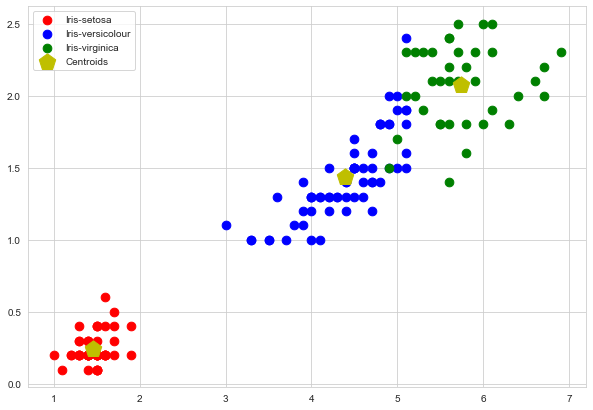

In [85]:
_ = plt.figure(figsize=(10, 7))
_ = plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], c = 'r', s=75, label = 'Iris-setosa')
_ = plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], c = 'b', s=75, label = 'Iris-versicolour')
_ = plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], c = 'g', s=75, label = 'Iris-virginica')

_ = plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], marker='p', s=300, c = 'y', label = 'Centroids')

plt.legend()

    As seen from EDA, PetalLength and PetalWidth are more suitable in differentiating between the species. Our K-Means model also shows more clear clustering in this case.